## Importing Relevant Libraries

In [ ]:
import yfinance as yf
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

ticker = yf.Ticker('ZOMATO.NS')        # Ticker is unique series of letter
zis= ticker.income_stmt

In [7]:
zis= zis.drop('2020-03-31',axis=1)
zis=zis.iloc[::-1]
zis=zis/10000000

In [10]:
zis.isnull().sum()

2024-03-31    1
2023-03-31    0
2022-03-31    0
2021-03-31    0
dtype: int64

In [11]:
zis.rename(columns={
    pd.to_datetime('2024-03-31'): '2024',
    pd.to_datetime('2023-03-31'): '2023',
    pd.to_datetime('2022-03-31'): '2022',
    pd.to_datetime('2021-03-31'): '2021'
}, inplace=True)


In [15]:
zis['2024'].fillna(0,inplace=True)

In [13]:
zis.head(5)

,2024,2023,2022,2021
Operating Revenue,12114.0,7035.0,4119.6,1915.8
Total Revenue,12114.0,7035.0,4119.6,1915.8
Cost Of Revenue,2882.0,1395.0,580.2,191.9
Gross Profit,9232.0,5640.0,3539.4,1723.9
Rent And Landing Fees,44.0,42.0,9.6,55.3


In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

df =pd.read_csv("ZomatoPL.csv" , index_col='Particular')

## 1. Ploting Revenue and Revenue Growth Over The Years


C:\Users\akshi\AppData\Local\Temp\ipykernel_17732\1686062328.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  revenue_growth = total_revenue.pct_change() * 100


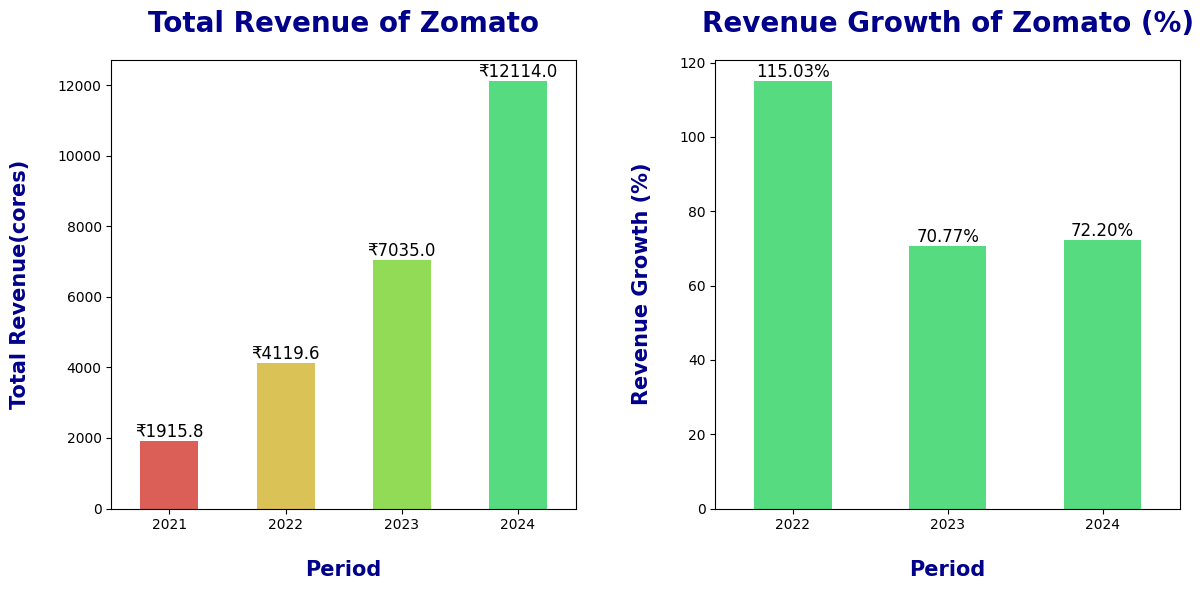

In [14]:

plt.figure(figsize=(12,6))

# Define the color palette
color = sns.color_palette('hls', 8)

# Plot 1: Total Revenue of Zomato Over Time
plt.subplot(1, 2, 1)
total_revenue = zis.loc['Total Revenue'][::-1]
total_revenue.plot(kind='bar', color=color[:len(total_revenue)])  # Adjust color to length of data
plt.title('Total Revenue of Zomato' , fontsize=20 ,fontweight="bold" , color='darkblue' ,pad=20)
plt.xlabel('Period' ,  fontweight="bold" , color='darkblue' , labelpad=20, fontsize=15)
plt.ylabel('Total Revenue(cores)' ,  fontweight="bold" , color='darkblue',labelpad=20, fontsize=15)
plt.xticks(rotation=0 , fontsize=10)
plt.tight_layout()
for i , v in enumerate(total_revenue):
    plt.text(i,v , f'₹{v:.1f}' , ha='center' ,va='bottom' ,  fontsize=12 )
# Plot 2: Revenue Growth of Zomato
plt.subplot(1, 2, 2)
revenue_growth = total_revenue.pct_change() * 100
revenue_growth = revenue_growth.dropna()  # Drop NaN values for percentage change
revenue_growth.plot(kind='bar', color=color[3])  # Adjust color to length of data
plt.title('Revenue Growth of Zomato (%)', fontsize=20 , fontweight="bold" , color='darkblue', pad=20)
plt.xlabel('Period',  fontweight="bold" , color='darkblue', labelpad=20 , fontsize=15) 
plt.ylabel('Revenue Growth (%)',  fontweight="bold" , color='darkblue' , labelpad=20, fontsize=15) 
plt.xticks(rotation=0 , fontsize=10)
plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.5)
# Adding data labels to the revenue growth chart
for index, value in enumerate(revenue_growth):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom', fontsize=12 ,)
    
plt.savefig("zomato_revenue_growth.png", dpi=300)

# Show the final plot

plt.show()


In [239]:
revenue_growth = total_revenue.pct_change() * 100
revenue_growth.dropna()

C:\Users\akshi\AppData\Local\Temp\ipykernel_16936\692565486.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  revenue_growth = total_revenue.pct_change() * 100


2022    115.032884
2023     70.769007
2024     72.196162
Name: Total Revenue, dtype: float64

## Profit and Loss Statement

In [4]:
df

,2024,2023,2022,2021
Particular,,,,
Net revenue(Net of excise),12114,7079,4192,1994
less : COGS,2882,1395,525,192
GP,9232,5684,3668,1802
less:Employee Expense,1659,1465,1633,741
less : Other expense,7531,5429,3886,1528


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, Net revenue(Net of excise) to net profit
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2024    13 non-null     int64
 1   2023    13 non-null     int64
 2   2022    13 non-null     int64
 3   2021    13 non-null     int64
dtypes: int64(4)
memory usage: 520.0+ bytes


In [19]:
x=print(u'\u20B9')

₹


In [20]:
revenue_growth = total_revenue.pct_change() * 100
revenue_growth.dropna()

C:\Users\akshi\AppData\Local\Temp\ipykernel_17732\692565486.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  revenue_growth = total_revenue.pct_change() * 100


2022    115.032884
2023     70.769007
2024     72.196162
Name: Total Revenue, dtype: float64

## 2. Plotting P&L Key Metrics

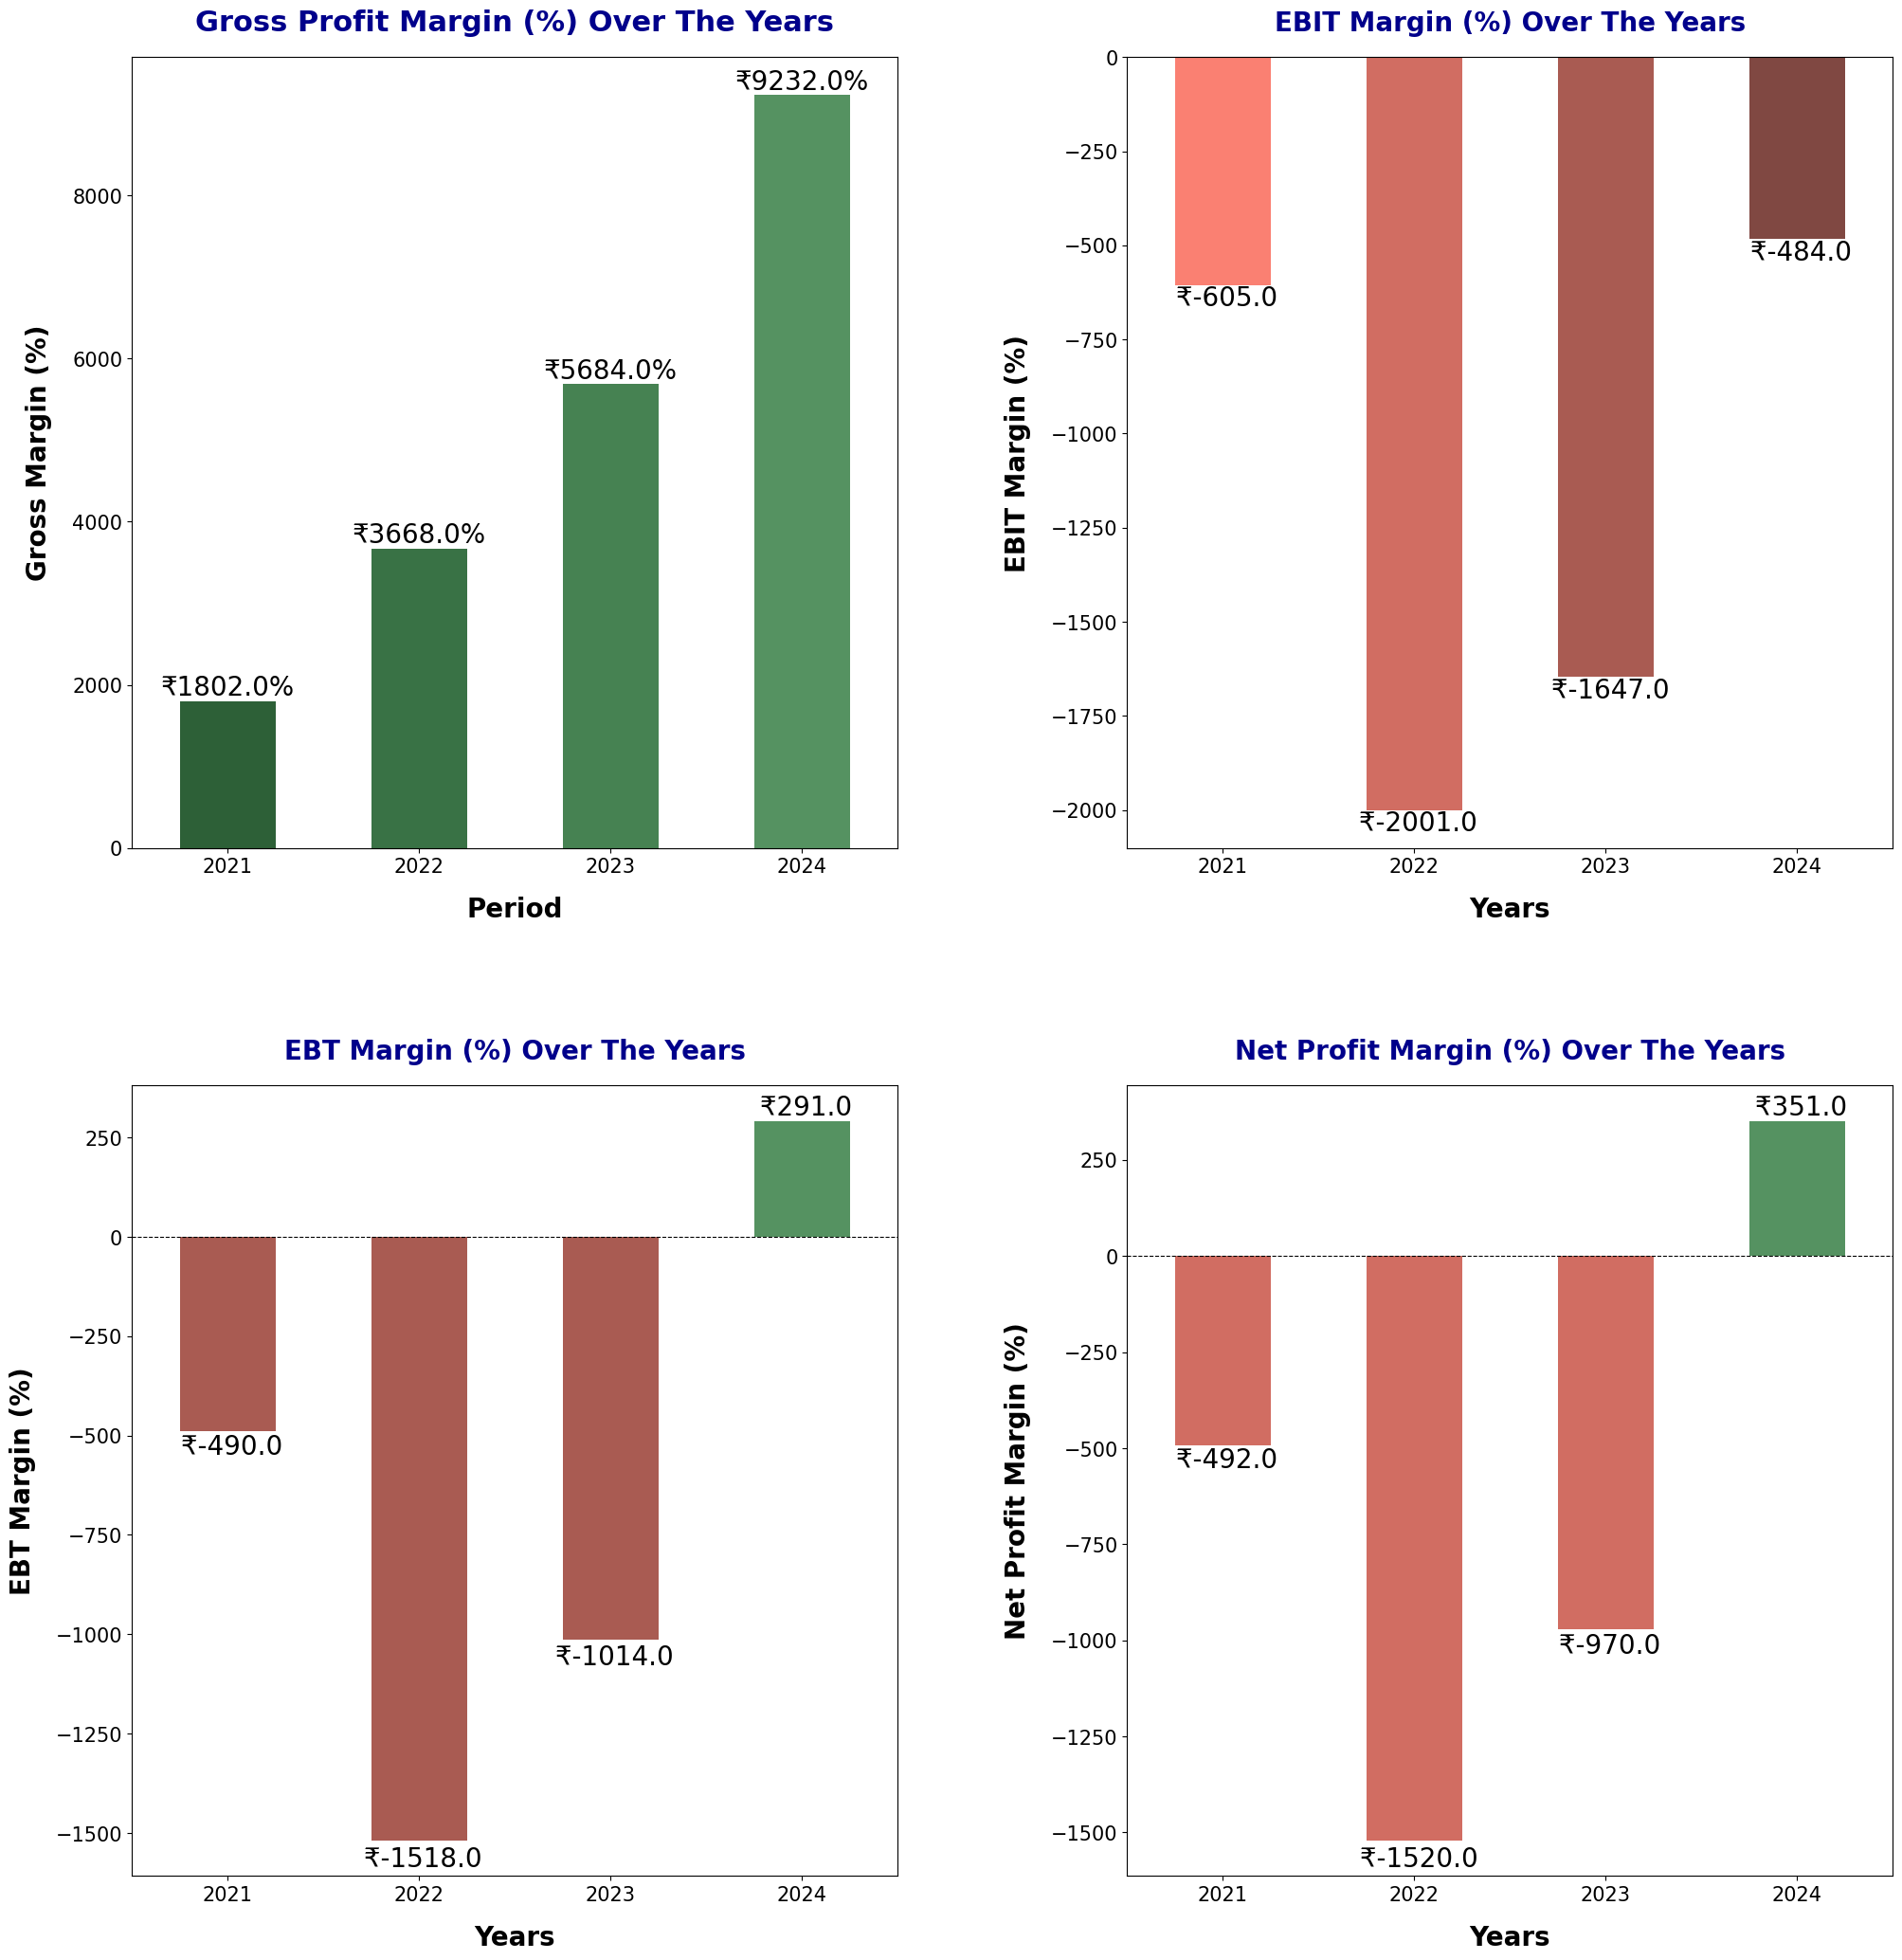

In [23]:
plt.figure(figsize=(20, 20))  # Increase figure size for better visibility

# Subplot 1: Gross Margin
plt.subplot(2, 2, 1)

# Define a classy cubehelix color plette (as a list of colors)
colorg = sns.cubehelix_palette(start=2, rot=0, dark=0.3, light=0.6, reverse=True, as_cmap=False)

# Sample data for demonstration (replace zis with your DataFrame)
# Assume zis is your DataFrame
gross_margin = df.loc['GP']
gross_margin = gross_margin[::-1]

# Plot the bars with individual colors for each bar
gross_margin.plot(kind='bar', color=[colorg[i % len(colorg)] for i in range(len(gross_margin))])  
plt.title('Gross Profit Margin (%) Over The Years', fontsize=22, fontweight="bold", color='darkblue', pad=20)
plt.xlabel('Period', fontweight="bold", color='black', labelpad=15, fontsize=20) 
plt.ylabel('Gross Margin (%)', fontweight="bold", color='black', labelpad=15, fontsize=20)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(fontsize=15)

# Adding classy black value labels
for i, v in enumerate(gross_margin):
    plt.text(i, v, f'₹{v:.1f}%', ha='center', va='bottom', fontsize=20, color='black')

# Add grid lines for better readability
plt.tight_layout()

# Subplot 2: EBIT
plt.subplot(2, 2, 2)
dark_red = sns.color_palette("dark:salmon_r", as_cmap=False)  # Correct the color assignment here
opt_m = df.loc['EBIT(Opt. exp.)']
opt_m = opt_m[::-1]
opt_m.plot(kind='bar', color=[dark_red[i % len(dark_red)] for i in range(len(opt_m))])  # Apply colors individually
plt.title("EBIT Margin (%) Over The Years", fontsize=20, fontweight="bold", color="darkblue", pad=20)
plt.xlabel("Years", fontsize=20, color="black", labelpad=15, fontweight="bold")
plt.ylabel("EBIT Margin (%)", fontsize=20, color="black", labelpad=15, fontweight="bold")
plt.xticks(rotation=0, fontsize=15)
plt.yticks(fontsize=15)

for i, v in enumerate(opt_m):
    if v > 0:
        plt.text(i, v , f"₹{v:.1f}", ha="center", va='bottom', fontsize=20, color='black')
    else:
        plt.text(i, v , f" ₹{v:.1f}", ha="center", va='top', fontsize=20, color='black')

# Subplot 3: EBT
plt.subplot(2, 2, 3)
colors = [colorg[3] if v > 0 else dark_red[2] for v in df.loc['EBT'][::-1]]  # Conditional color assignment
ebt_m =df.loc['EBT']
ebt_m = ebt_m[::-1]
ebt_m.plot(kind='bar', color=colors)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Horizontal line at y=0
plt.title("EBT Margin (%) Over The Years", fontsize=20, fontweight="bold", color="darkblue", pad=20)
plt.xlabel("Years", fontsize=20, color="black", labelpad=15, fontweight="bold")
plt.ylabel("EBT Margin (%)", fontsize=20, color="black", labelpad=15, fontweight="bold")
plt.xticks(rotation=0, fontsize=15)
plt.yticks(fontsize=15)

for i, v in enumerate(ebt_m):
    if v > 0:
        plt.text(i, v , f" ₹{v:.1f}", ha="center", va='bottom', fontsize=20, color='black')
    else:
        plt.text(i, v + (v * 0.01), f" ₹{v:.1f}", ha="center", va='top', fontsize=20, color='black')

# Subplot 4: Net Profit
plt.subplot(2, 2, 4)
ni_m = df.loc['net profit']
ni_m=ni_m[::-1]
colors = [colorg[3] if v > 0 else dark_red[1] for v in ni_m]  # Conditional color assignment
ni_m.plot(kind='bar', color=colors)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Horizontal line at y=0
plt.title("Net Profit Margin (%) Over The Years", fontsize=20, fontweight="bold", color="darkblue", pad=20)
plt.xlabel("Years", fontsize=20, color="black", labelpad=15, fontweight="bold")
plt.ylabel("Net Profit Margin (%)", fontsize=20, color="black", labelpad=15, fontweight="bold")
plt.xticks(rotation=0, fontsize=15)
plt.yticks(fontsize=15)

for i, v in enumerate(ni_m):
    if v > 0:
        plt.text(i, v , f" ₹{v:.1f}", ha="center", va='bottom', fontsize=20, color='black')
    else:
        plt.text(i, v + (v * 0.01), f" ₹{v:.1f}", ha="center", va='top', fontsize=20, color='black')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.savefig('Margins' , dpi=300 , bbox_inches='tight')

# Display the plot
plt.show()


## 3. Plotting Profitability Margins

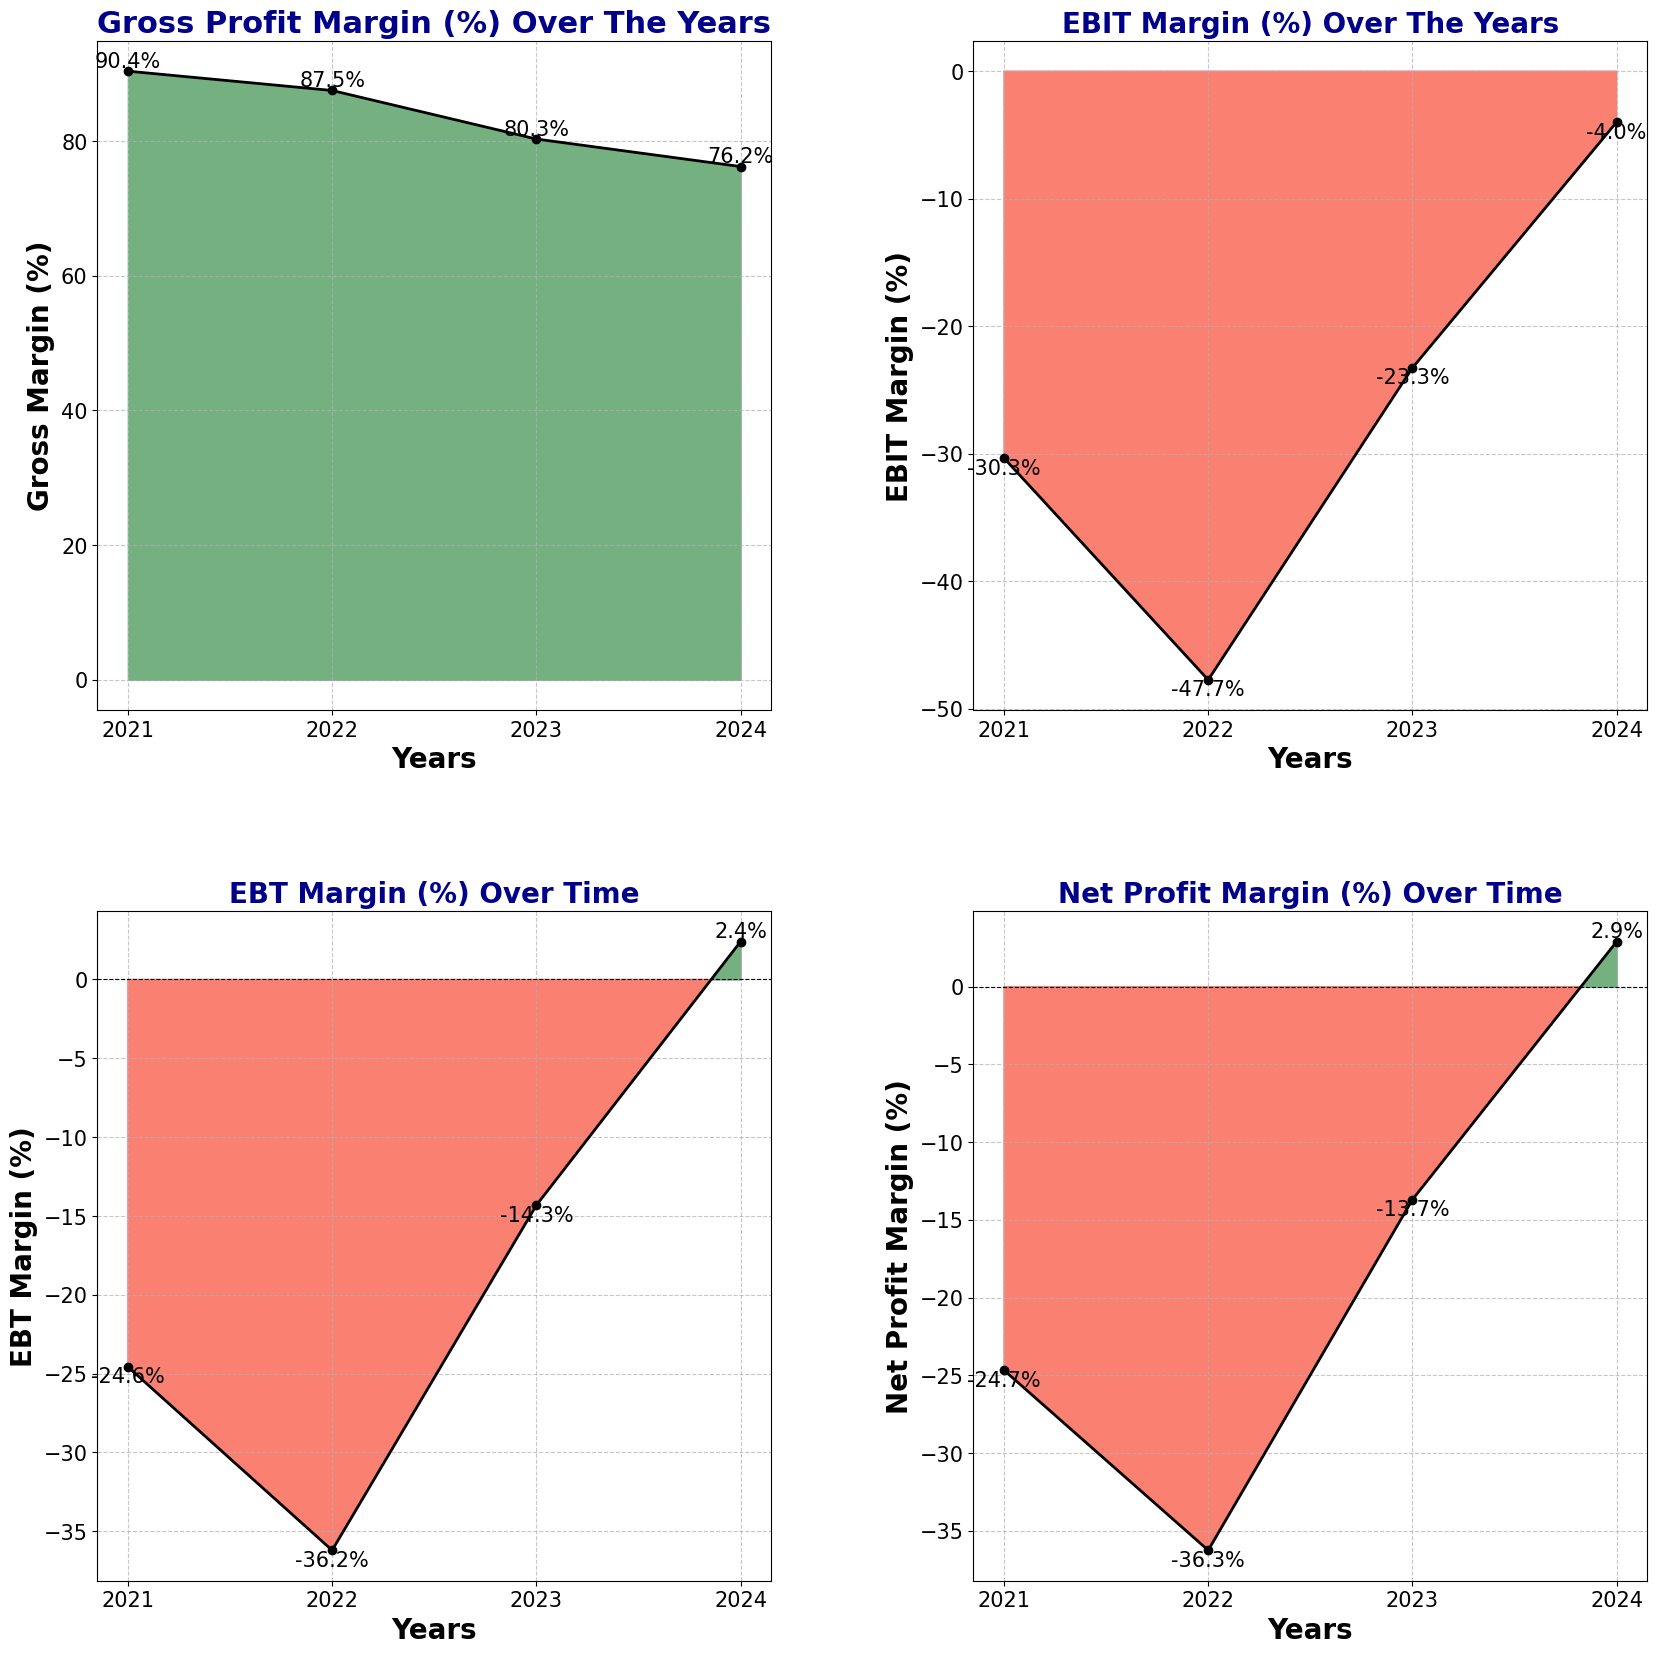

In [402]:

# Define the color palette for positive (green) and negative (red) values
positive_color = sns.cubehelix_palette(start=2, rot=0, dark=0.3, light=0.6, reverse=True, as_cmap=False)
negative_color =sns.color_palette("dark:salmon_r", as_cmap=False)
positive_color=positive_color[5]

# Create figure with four subplots
plt.figure(figsize=(20, 20))

# Gross Margin Plot
plt.subplot(2, 2, 1)
gross_margin = df.loc['GP'] / df.loc['Net revenue(Net of excise)'] * 100
gross_margin = gross_margin[::-1]
colors = [positive_color if v > 0 else negative_color for v in gross_margin]

plt.plot(gross_margin, marker='o', color='black', linewidth=2)
plt.fill_between(gross_margin.index, gross_margin, color=positive_color, where=gross_margin > 0, interpolate=True)
plt.fill_between(gross_margin.index, gross_margin, color=negative_color, where=gross_margin <= 0, interpolate=True)
plt.title('Gross Profit Margin (%) Over The Years', fontsize=22, fontweight="bold", color='darkblue')
plt.xlabel('Years', fontweight="bold", fontsize=20)
plt.ylabel('Gross Margin (%)', fontweight="bold", fontsize=20)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(fontsize=15)
for i, v in enumerate(gross_margin):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom' if v > 0 else 'top', fontsize=15, color='black')

# EBIT Plot
plt.subplot(2, 2, 2)
opt_m = df.loc['EBIT(Opt. exp.)'] / df.loc['Net revenue(Net of excise)'] * 100
opt_m = opt_m[::-1]
colors = [positive_color if v > 0 else negative_color for v in opt_m]

plt.plot(opt_m, marker='o', color='black', linewidth=2)
plt.fill_between(opt_m.index, opt_m, color=positive_color, where=opt_m > 0, interpolate=True)
plt.fill_between(opt_m.index, opt_m, color=negative_color, where=opt_m <= 0, interpolate=True)
plt.title('EBIT Margin (%) Over The Years', fontsize=20, fontweight="bold", color="darkblue")
plt.xlabel("Years", fontsize=20, fontweight="bold")
plt.ylabel("EBIT Margin (%)", fontsize=20, fontweight="bold")
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(fontsize=15)
for i, v in enumerate(opt_m):
    plt.text(i, v, f"{v:.1f}%", ha="center", va='bottom' if v > 0 else 'top', fontsize=15, color='black')

# EBT Plot
plt.subplot(2, 2, 3)
ebt_m = df.loc['EBT'] / df.loc['Net revenue(Net of excise)'] * 100
ebt_m = ebt_m[::-1]
colors = [positive_color if v > 0 else negative_color for v in ebt_m]

plt.plot(ebt_m, marker='o', color='black', linewidth=2)
plt.fill_between(ebt_m.index, ebt_m, color=positive_color, where=ebt_m > 0, interpolate=True)
plt.fill_between(ebt_m.index, ebt_m, color=negative_color, where=ebt_m <= 0, interpolate=True)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.title('EBT Margin (%) Over Time', fontsize=20, fontweight="bold", color="darkblue")
plt.xlabel("Years", fontsize=20, fontweight="bold")
plt.ylabel("EBT Margin (%)", fontsize=20, fontweight="bold")
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(fontsize=15)
for i, v in enumerate(ebt_m):
    plt.text(i, v, f"{v:.1f}%", ha="center", va='bottom' if v > 0 else 'top', fontsize=15, color='black')

# Net Profit Margin Plot
plt.subplot(2, 2, 4)
ni_m = df.loc['net profit'] / df.loc['Net revenue(Net of excise)'] * 100
ni_m = ni_m[::-1]
colors = [positive_color if v > 0 else negative_color for v in ni_m]

plt.plot(ni_m, marker='o', color='black', linewidth=2)
plt.fill_between(ni_m.index, ni_m, color=positive_color, where=ni_m > 0, interpolate=True)
plt.fill_between(ni_m.index, ni_m, color=negative_color, where=ni_m <= 0, interpolate=True)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.title('Net Profit Margin (%) Over Time', fontsize=20, fontweight="bold", color="darkblue")
plt.xlabel("Years", fontsize=20, fontweight="bold")
plt.ylabel("Net Profit Margin (%)", fontsize=20, fontweight="bold")
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(fontsize=15)
for i, v in enumerate(ni_m):
    plt.text(i, v, f"{v:.1f}%", ha="center", va='bottom' if v > 0 else 'top', fontsize=15, color='black')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.savefig('Margins', dpi=300, bbox_inches='tight')

plt.show()


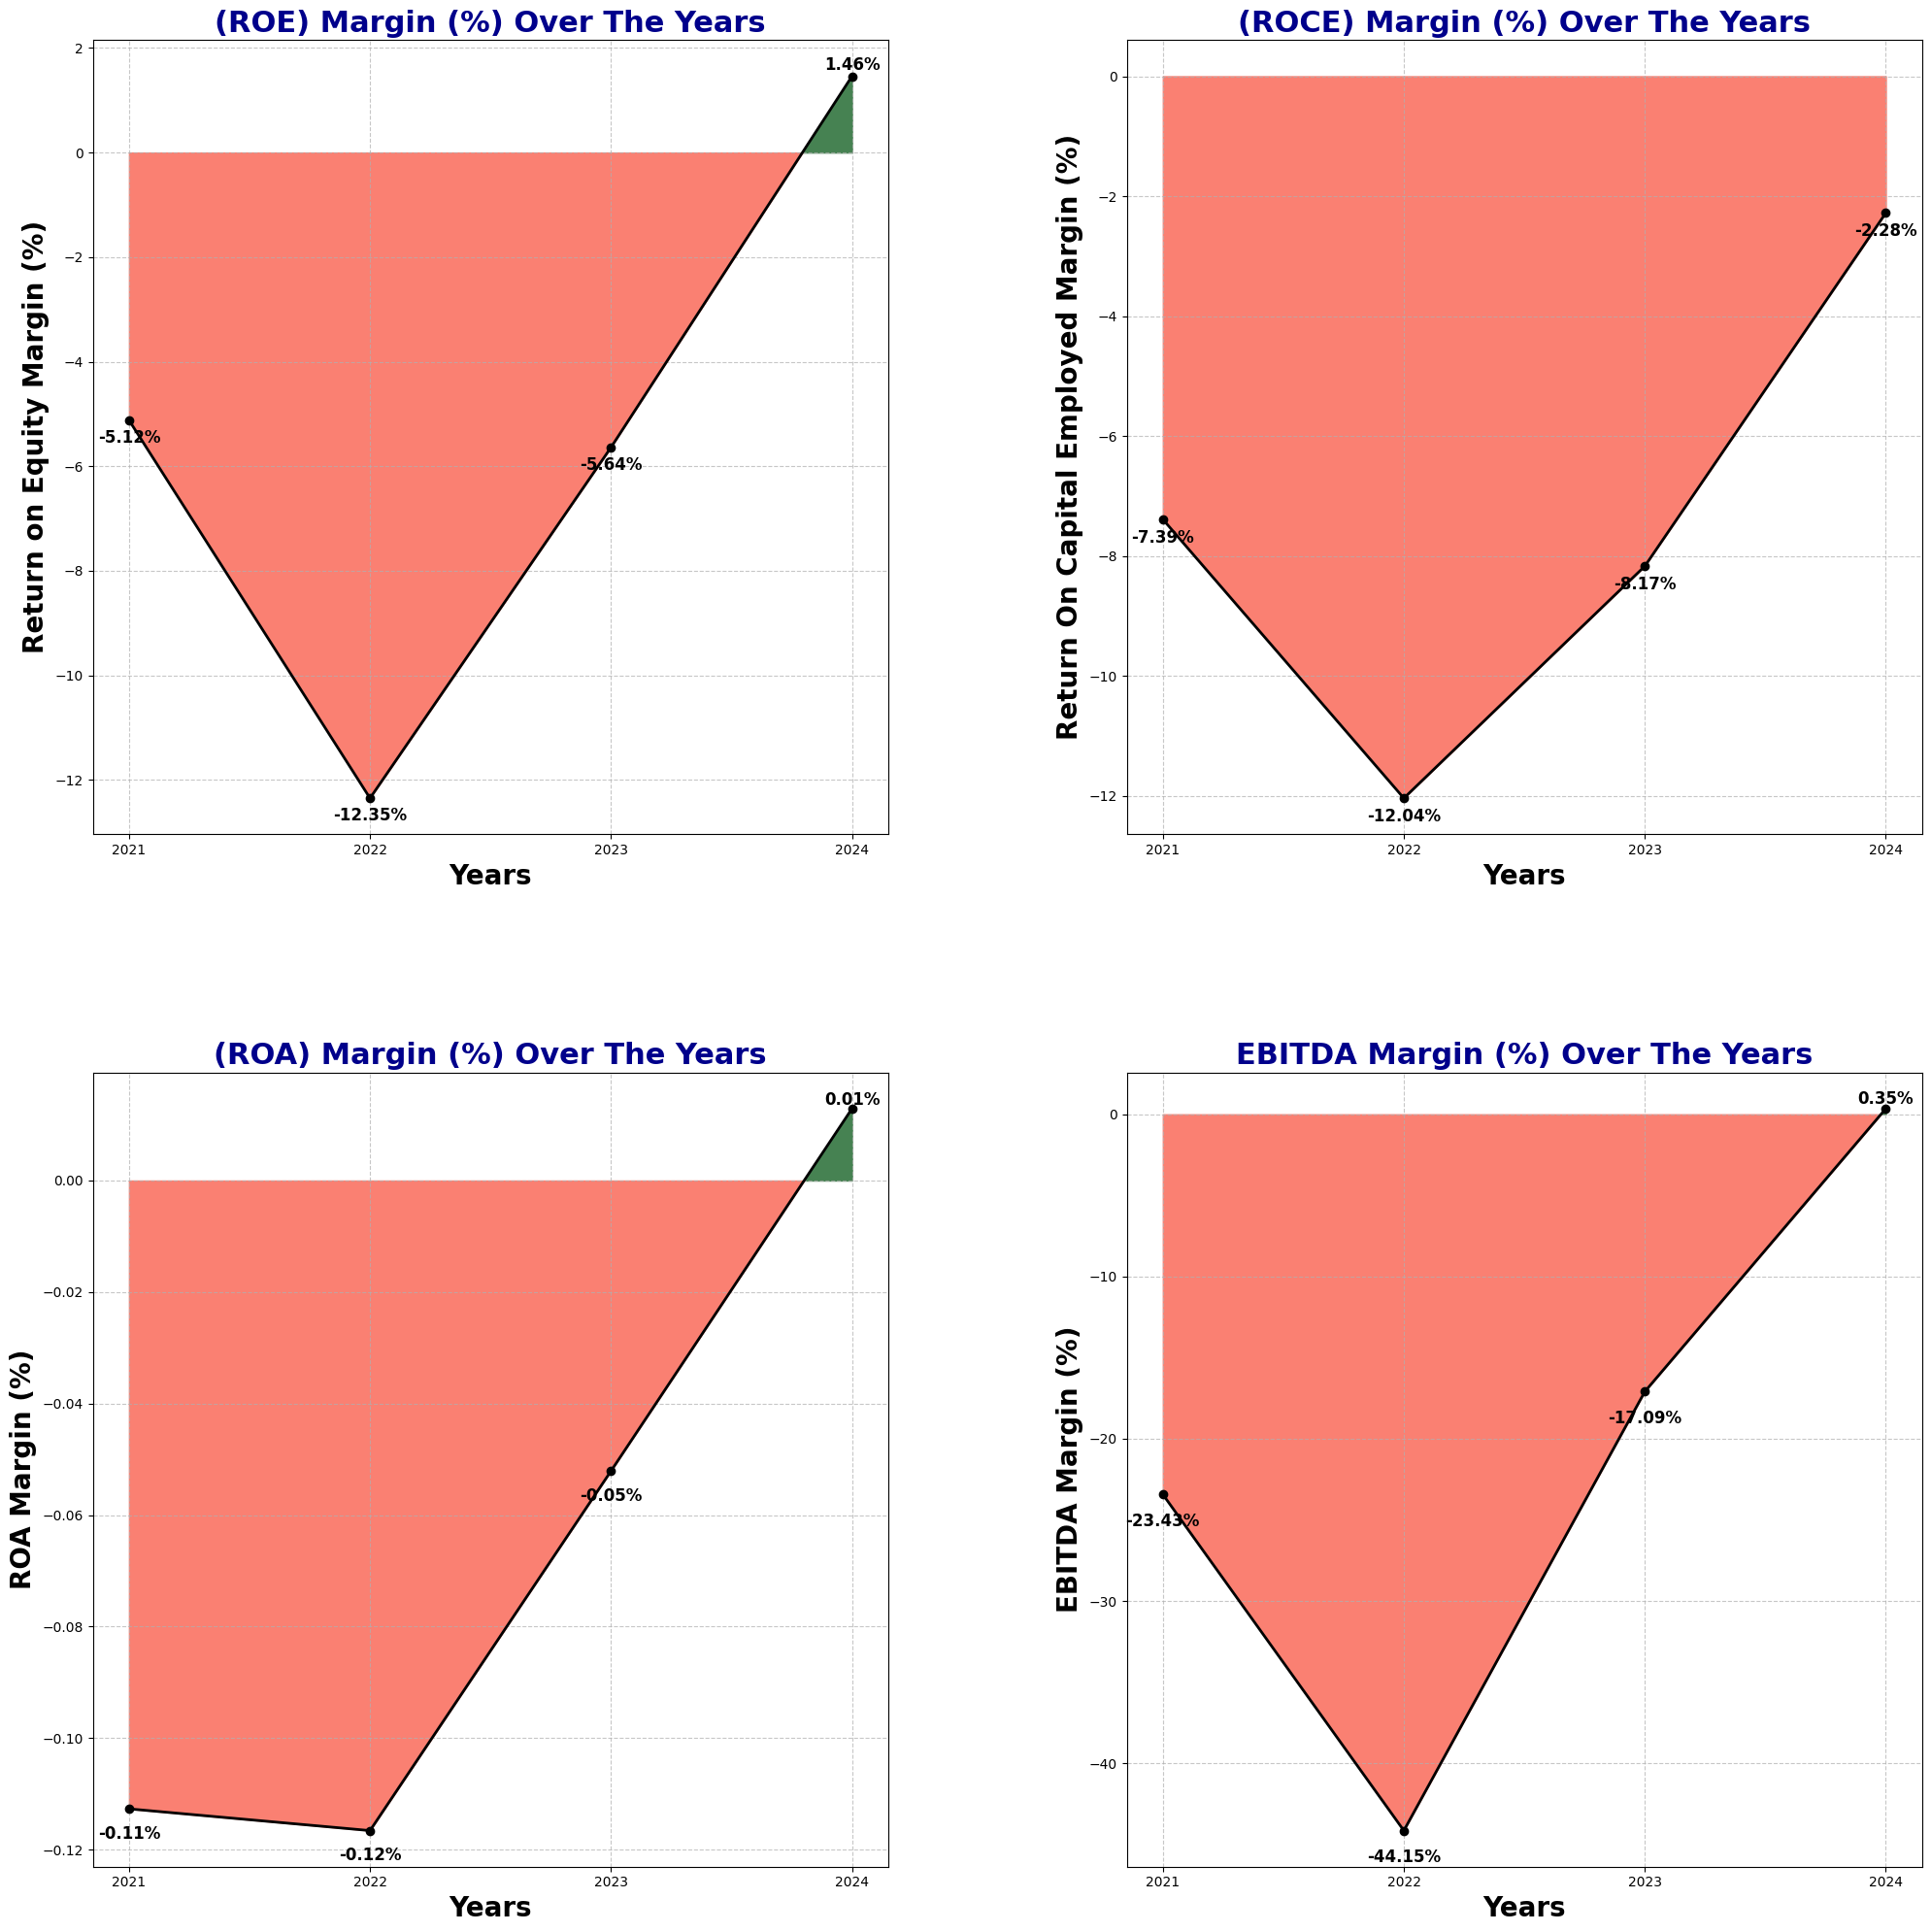

In [406]:
plt.figure(figsize=(20, 20))
positive_color = sns.cubehelix_palette(start=2, rot=0, dark=0.3, light=0.6, reverse=True, as_cmap=False)[2]
negative_color = sns.color_palette("dark:salmon_r", as_cmap=False)

# ROE Plot
plt.subplot(2, 2, 1)
roe = zr.loc['ROE'].iloc[::-1]
plt.plot(roe, marker='o', color='black', linewidth=2)
plt.fill_between(roe.index, roe, color=positive_color, where=roe > 0, interpolate=True)
plt.fill_between(roe.index, roe, color=negative_color[0], where=roe <= 0, interpolate=True)
plt.title('(ROE) Margin (%) Over The Years', fontsize=22, fontweight="bold", color='darkblue')
plt.xlabel('Years', fontweight="bold", fontsize=20)
plt.ylabel('Return on Equity Margin (%)', fontweight="bold", fontsize=20)
plt.grid(True, linestyle='--', alpha=0.7)
for i, v in enumerate(roe):
    if v > 0:
        plt.text(i, v+0.05, f'{v:.2f}%', ha='center', va='bottom' , fontsize=12, color='black',fontweight='bold')
    else:
        plt.text(i, v -0.5, f'{v:.2f}%', ha='center', va='bottom'  , fontsize=12, color='black',fontweight='bold')

# ROCE Plot
plt.subplot(2, 2, 2)
ROCE = zr.loc['ROCE'].iloc[::-1]
plt.plot(ROCE, marker='o', color='black', linewidth=2)
plt.fill_between(ROCE.index, ROCE, color=positive_color, where=ROCE > 0, interpolate=True)
plt.fill_between(ROCE.index, ROCE, color=negative_color[0], where=ROCE <= 0, interpolate=True)
plt.title('(ROCE) Margin (%) Over The Years', fontsize=22, fontweight="bold", color='darkblue')
plt.xlabel('Years', fontweight="bold", fontsize=20)
plt.ylabel('Return On Capital Employed Margin (%)', fontweight="bold", fontsize=20)
plt.grid(True, linestyle='--', alpha=0.7)
for i, v in enumerate(ROCE):
     if v > 0:
        plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom' , fontsize=12, color='black',fontweight='bold')
     else:
        plt.text(i, v-0.45, f'{v:.2f}%', ha='center', va='bottom'  , fontsize=12, color='black',fontweight='bold')

# ROA Plot
plt.subplot(2, 2, 3)
ROA=zr.loc['ROA']
ROA=ROA.iloc[0][::-1]
plt.plot(ROA, marker='o', color='black', linewidth=2)
plt.fill_between(ROA.index, ROA, color=positive_color, where=ROA > 0, interpolate=True)
plt.fill_between(ROA.index, ROA, color=negative_color[0], where=ROA <= 0, interpolate=True)
plt.title('(ROA) Margin (%) Over The Years', fontsize=22, fontweight="bold", color='darkblue')
plt.xlabel('Years', fontweight="bold", fontsize=20)
plt.ylabel('ROA Margin (%)', fontweight="bold", fontsize=20)
plt.grid(True, linestyle='--', alpha=0.7)
for i, v in enumerate(ROA):
    if v > 0:
        plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom' , fontsize=12, color='black',fontweight='bold')
    else:
        plt.text(i, v-0.006, f'{v:.2f}%', ha='center', va='bottom'  , fontsize=12, color='black',fontweight='bold')

# EBITDA Plot
plt.subplot(2, 2, 4)
EBITDA = zr.loc['EBITDA '].iloc[::-1]
plt.plot(EBITDA, marker='o', color='black', linewidth=2)
plt.fill_between(EBITDA.index, EBITDA, color=positive_color, where=EBITDA > 0, interpolate=True)
plt.fill_between(EBITDA.index, EBITDA, color=negative_color[0], where=EBITDA <= 0, interpolate=True)
plt.title('EBITDA Margin (%) Over The Years', fontsize=22, fontweight="bold", color='darkblue')
plt.xlabel('Years', fontweight="bold", fontsize=20)
plt.ylabel('EBITDA Margin (%)', fontweight="bold", fontsize=20)
plt.grid(True, linestyle='--', alpha=0.7)
for i, v in enumerate(EBITDA):
    if v > 0:
        plt.text(i, v+0.05, f'{v:.2f}%', ha='center', va='bottom' , fontsize=12, color='black',fontweight='bold')
    else:
        plt.text(i, v -2.2, f'{v:.2f}%', ha='center', va='bottom'  , fontsize=12, color='black',fontweight='bold')

plt.tight_layout()
    

# Adjust layout
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.savefig("Other Margin" , dpi=300 , bbox_inches='tight')
plt.show()


## Balance sheet


In [248]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Don't wrap to multiple lines

# Display the DataFrame

# Reset options (optional)
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.expand_frame_repr')

In [249]:
zbal=pd.read_csv('Zomatoo_BS.csv' )

In [250]:
zbal = zbal.drop([0], axis=0)
zbal.head()

,Consolidated balance sheet - Zomato,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
1,Particulars,2024.0,2023.0,2022.0,2021.0
2,Assets,NaN,NaN,NaN,NaN
3,Non-current assets,NaN,NaN,NaN,NaN
4,"Property, plant and equipment",287.0,209.0,50.9,23.3
5,Capital work-in-progress,18.0,7.0,0.6,0.0


In [251]:
zbal= zbal.rename(columns={'Consolidated balance sheet - Zomato':'Particulars', 'Unnamed: 1':'2024','Unnamed: 2':'2023','Unnamed: 3':'2022','Unnamed: 4':'2021',})

In [252]:
 zbal=zbal.drop([1],axis=0)

In [253]:
zbal=zbal.set_index('Particulars')
zbal.fillna('-').head()

,2024,2023,2022,2021
Particulars,,,,
Assets,-,-,-,-
Non-current assets,-,-,-,-
"Property, plant and equipment",287.0,209.0,50.9,23.3
Capital work-in-progress,18.0,7.0,0.6,0.0
Right-of-use asset,690.0,427.0,64.2,60.5


## 4. Working capital And Current Ratio Analysis

In [159]:
working_capital = zbal.loc['Total current assets'] - zbal.loc['Total current liabilities']
working_capital=working_capital[::-1]
working_capital

2021    3632.8
2022    6833.5
2023    9390.0
2024    3375.0
dtype: float64

In [160]:
cr=round(zbal.loc['Total current assets'] / zbal.loc['Total current liabilities'],2)
cr=cr[::-1]
cr

2021     8.02
2022    10.60
2023     7.52
2024     2.62
dtype: float64

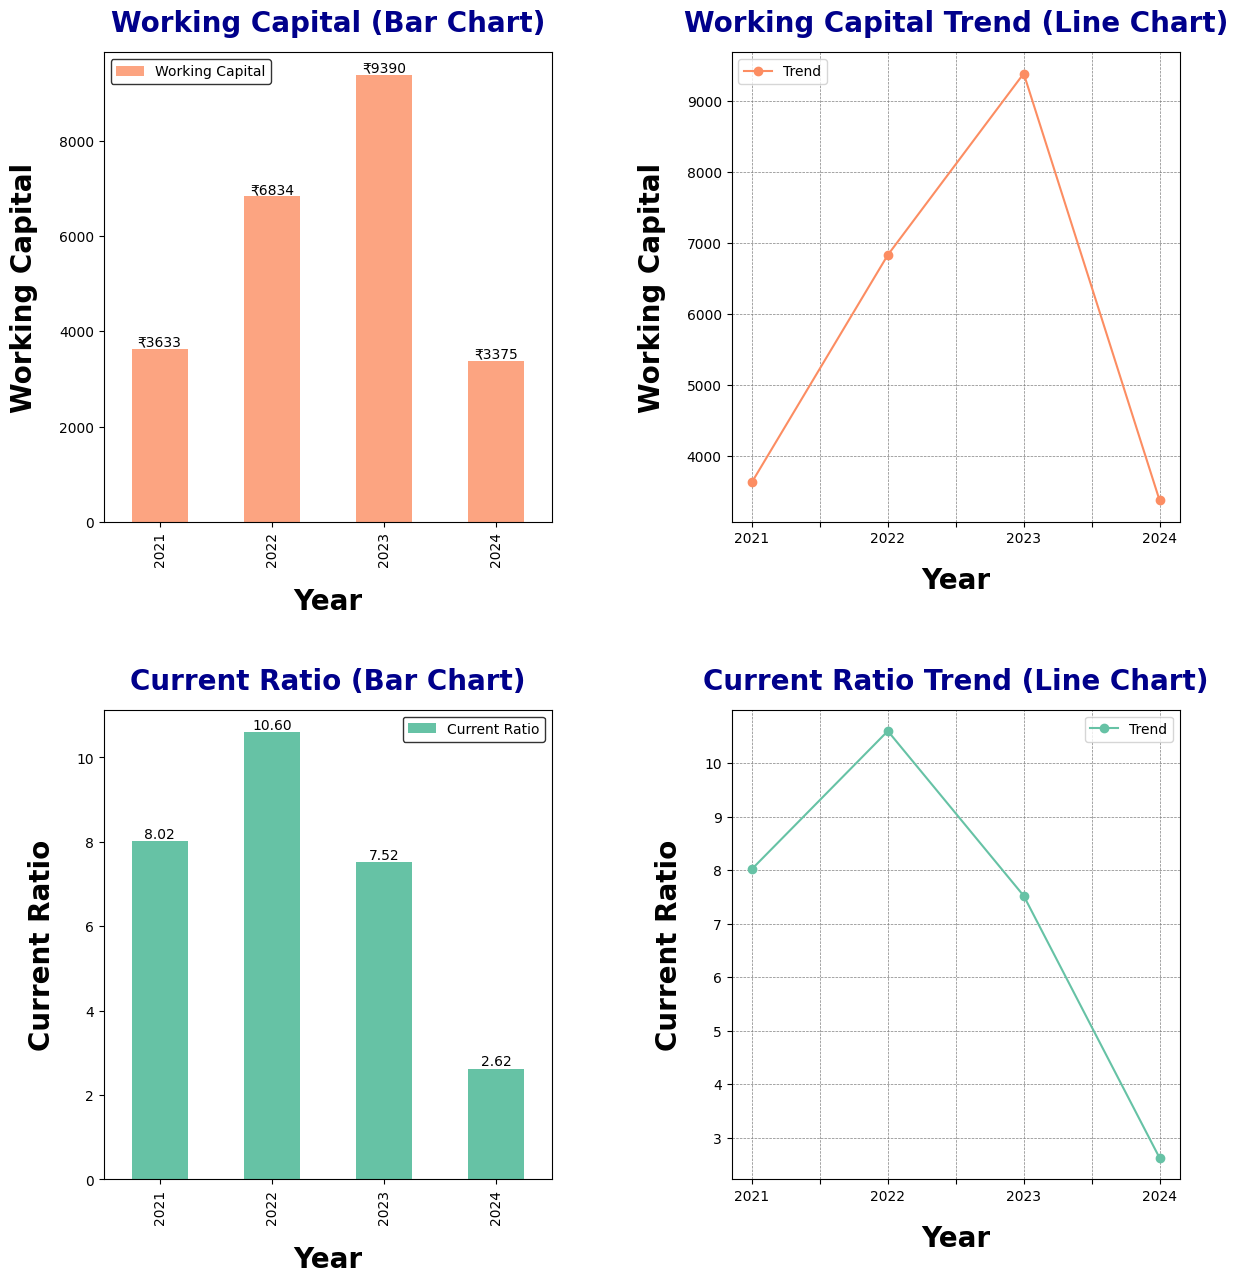

In [280]:
plt.figure(figsize=(12,12))
# Assuming 'working_capital' is a pandas Series with years as index

# Define color palette
color = sns.color_palette('Set2')

# Create a figure with two subplots


# Subplot 1: Bar chart
plt.subplot(2, 2, 1)
working_capital.plot(kind='bar', color=color[1], label='Working Capital', alpha=0.8)
for i, v in enumerate(values):
    plt.text(i, v, f"₹{v:.0f}", ha='center', va='bottom')

plt.xlabel('Year',fontweight="bold", color='black', labelpad=15, fontsize=20)          # Correct method for labels
plt.ylabel('Working Capital',fontweight="bold", color='black', labelpad=15, fontsize=20)
plt.title('Working Capital (Bar Chart)',fontweight="bold", color='darkblue', pad=15, fontsize=20)
plt.legend(loc='upper left', frameon=True, facecolor='white', edgecolor='black')

# Subplot 2: Line chart
plt.subplot(2, 2, 2)
working_capital.plot(kind='line', color=color[1], marker='o', label='Trend')

plt.xlabel('Year',fontweight="bold", color='black', labelpad=15, fontsize=20)
plt.ylabel('Working Capital',fontweight="bold", color='black', labelpad=15, fontsize=20)
plt.title('Working Capital Trend (Line Chart)',fontweight="bold", color='darkblue', pad=15, fontsize=20)
plt.legend(loc='upper left', )  # Place legend outside the plot area
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color="grey")
  # Place legend outside the plot area


# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlap






# Assuming 'working_capital' is a pandas Series with years as index
years = working_capital.index
values = working_capital.values

# Define color palette
color = sns.color_palette('Set2')

# Create a figure with two subplots


# Subplot 1: Bar chart
plt.subplot(2, 2, 3)
cr.plot(kind='bar', color=color[0], label='Current Ratio', alpha=1)
for i, v in enumerate(cr):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')

plt.xlabel('Year',fontweight="bold", color='black', labelpad=15, fontsize=20)          # Correct method for labels
plt.ylabel('Current Ratio',fontweight="bold", color='black', labelpad=15, fontsize=20)
plt.title('Current Ratio (Bar Chart)',fontweight="bold", color='darkblue', pad=15, fontsize=20)
plt.legend(loc='upper right', frameon=True, facecolor='white', edgecolor='black')

# Subplot 2: Line chart
plt.subplot(2, 2, 4)
cr.plot(kind='line', color=color[0], marker='o', label='Trend')

plt.xlabel('Year',fontweight="bold", color='black', labelpad=15, fontsize=20)
plt.ylabel('Current Ratio',fontweight="bold", color='black', labelpad=15, fontsize=20)
plt.title('Current Ratio Trend (Line Chart)',fontweight="bold", color='darkblue', pad=15, fontsize=20)
plt.legend(loc='upper right', )  # Place legend outside the plot area
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color="grey")


  # Place legend outside the plot area


# Display the plot
plt.subplots_adjust(wspace=0.4,hspace=0.4)
# plt.savefig('working_capita' , dpi=300 , bbox_inches='tight')
plt.show()


## Ratio Analysis

In [47]:
zr=pd.read_csv("Zomato_Ratio.csv" , index_col="Particular")

In [56]:
zr.head(7


,2024,2023,2022,2021
Particular,,,,
EBITDA,35.0000,-1709.0000,-4415.0000,-2343.0000
EBIT,-400.0000,-2327.0000,-4773.0000,-3034.0000
EBT,240.0000,-1432.0000,-3621.0000,-2460.0000
Net Profit Margin,290.0000,-1370.0000,-3626.0000,-2466.0000
ROE,146.0000,-564.0000,-1235.0000,-512.0000
ROCE,-228.0000,-817.0000,-1204.0000,-739.0000
ROA,129.0000,-521.0000,-1166.0000,-1127.0000
CR,2.6203,7.5200,10.6000,8.0200
QR,2.5780,7.4600,10.5500,7.9900


In [55]:
zr.iloc[0:7]= zr.iloc[0:7]*100

## 5. Activity Ratio

In [58]:
zr.iloc[10:14]

,2024,2023,2022,2021
Particular,,,,
working capital turnover ratio,1.8980,0.8727,0.8011,0.6763
Asset_Turnover_Ratio,0.5389,0.3637,0.3221,0.1779
ITR,33.7076,22.7384,19.2514,9.0594
APTR,3.6831,2.5185,1.4452,0.5390


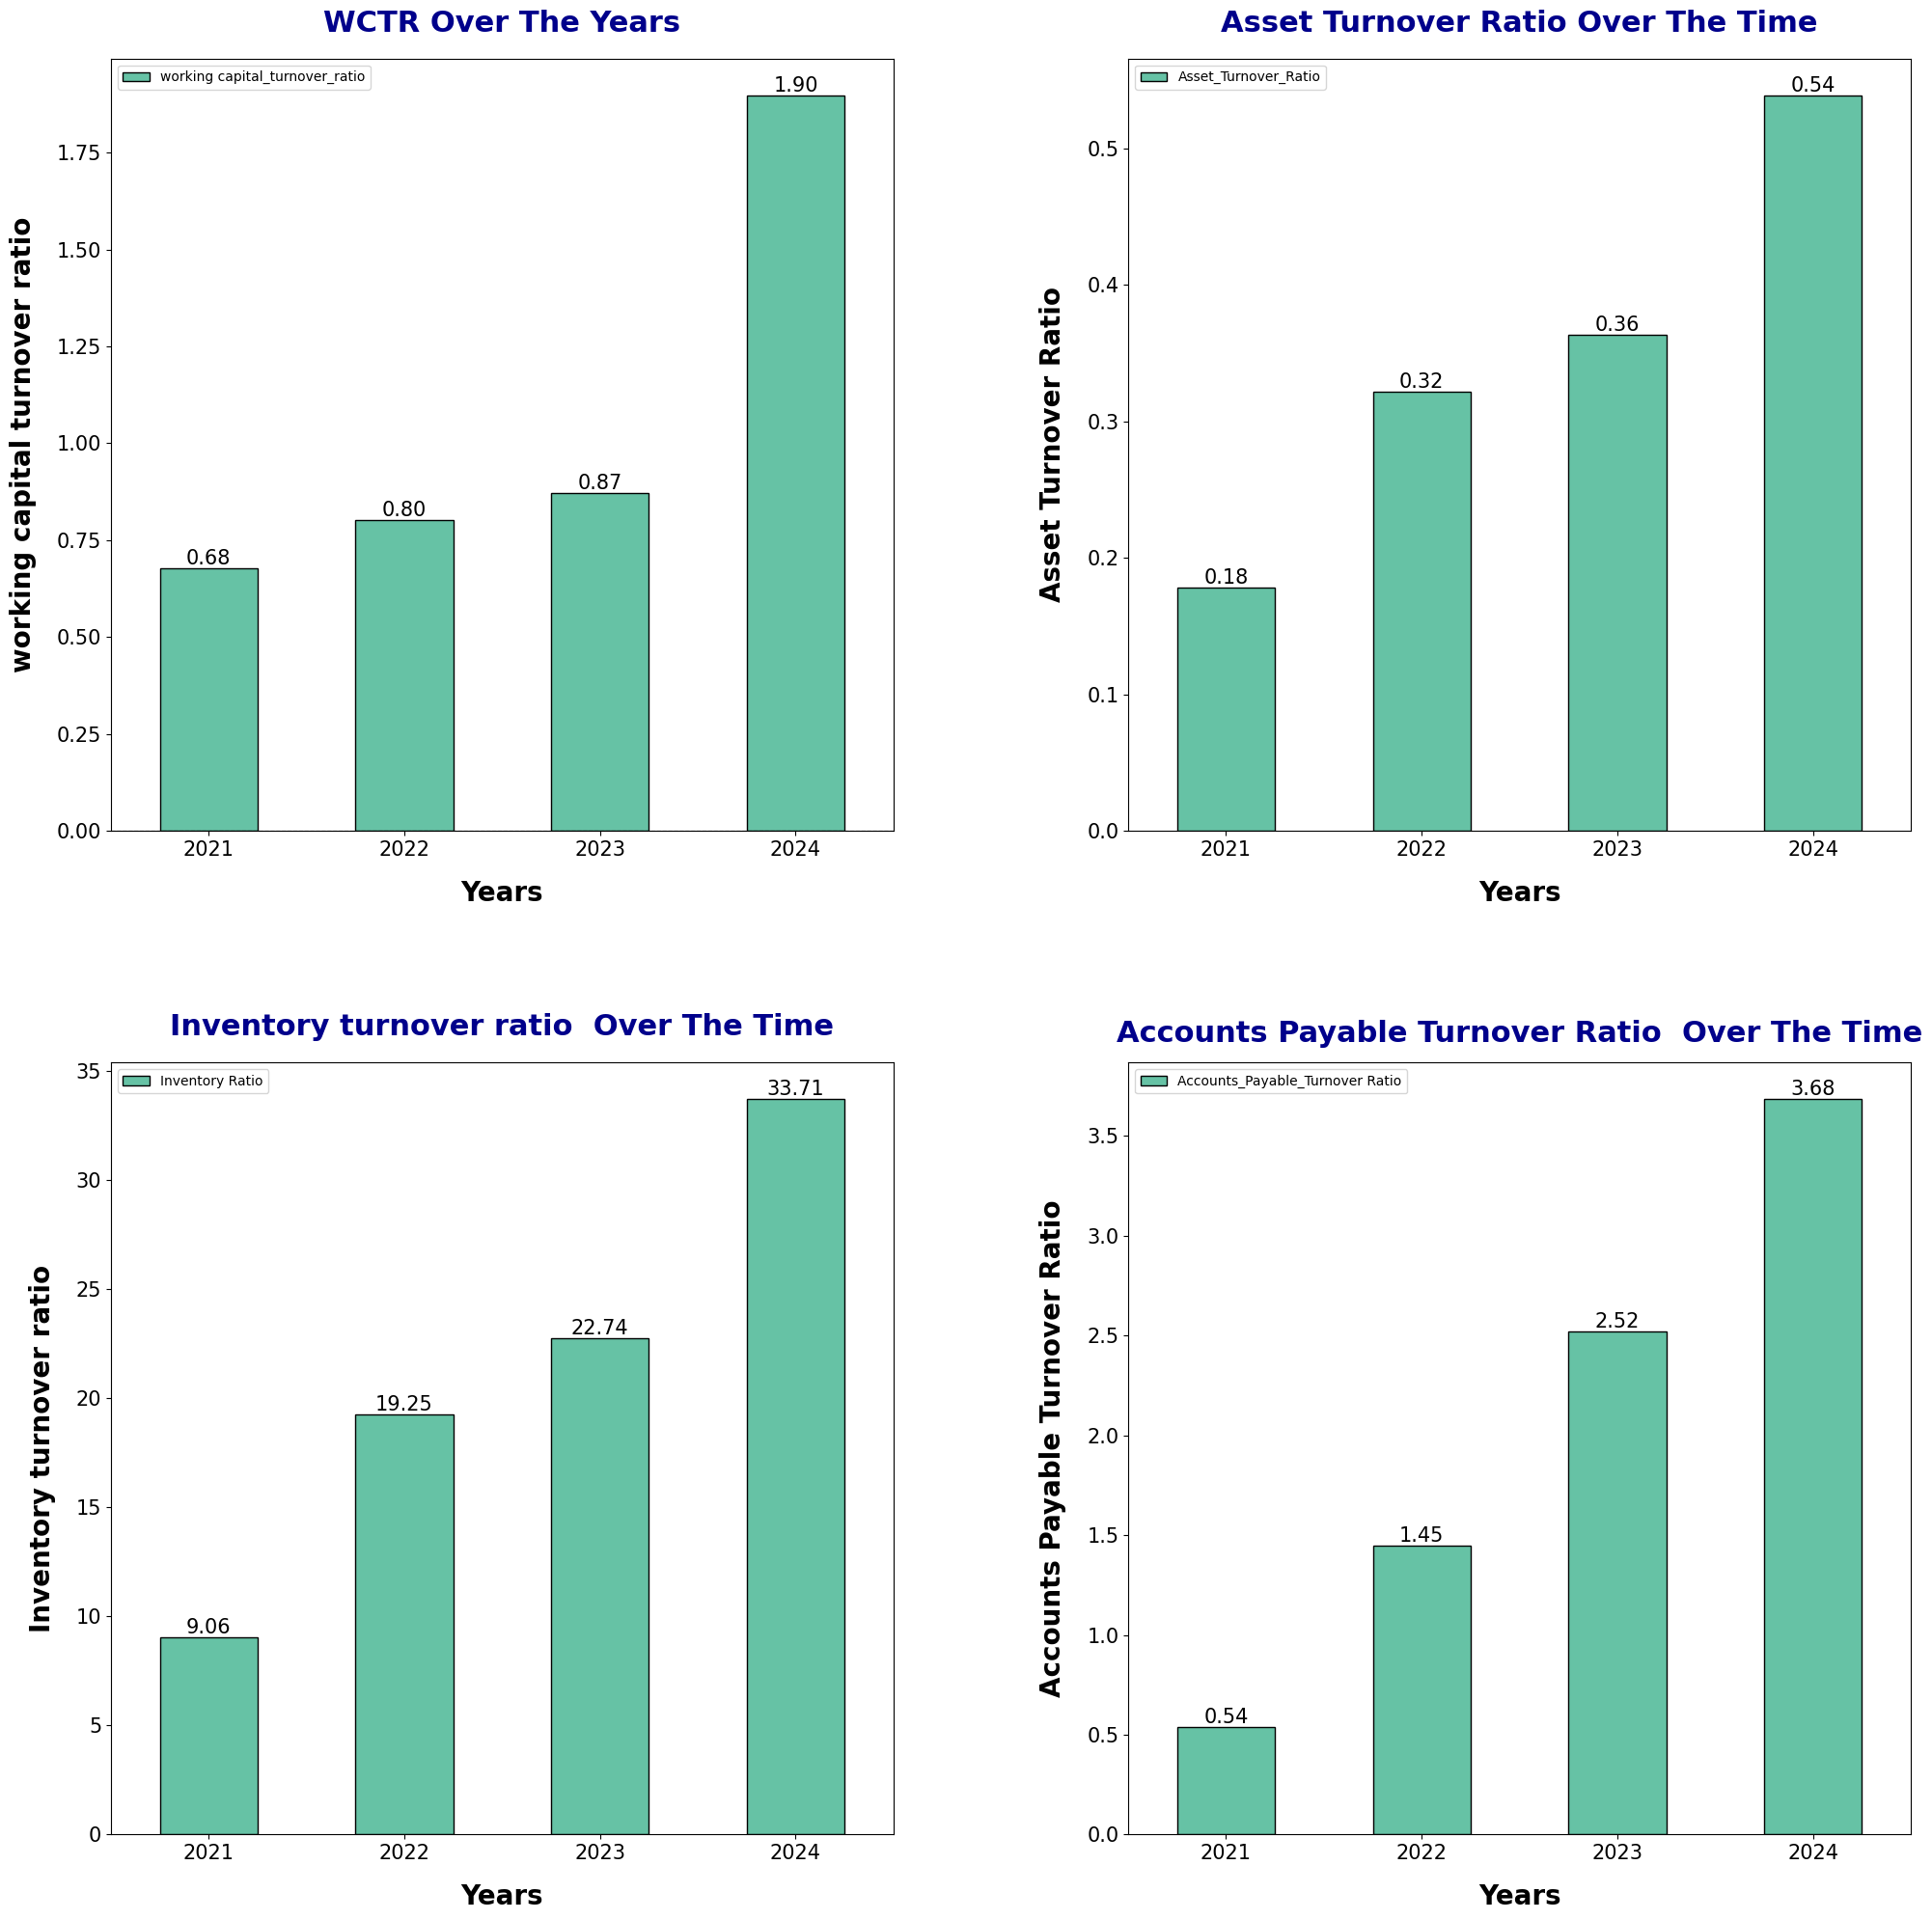

In [54]:
plt.figure(figsize=(20,20))
color=sns.color_palette('Set2')
plt.subplot(2, 2, 1)
wctr = zr.loc['working capital turnover ratio'].iloc[::-1]  # Reverse data for chronological order
colors = [color[0] if val > 0 else color[1] for val in wctr]  # Color based on value

# Plot Current Ratio as a bar chart with customized colors and outlines
wctr.plot( kind='bar',color=colors, label='working capital_turnover_ratio', alpha=1, edgecolor='black', linewidth=1)
plt.title('WCTR Over The Years', fontsize=22, fontweight="bold", color='darkblue', pad=20)
plt.xlabel('Years', fontweight="bold", color='black', labelpad=15, fontsize=20)
plt.ylabel('working capital turnover ratio', fontweight="bold", color='black', labelpad=15, fontsize=20)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(fontsize=15)
plt.axhline(0 , color='black' , linewidth=0.8 , linestyle='--')

# Annotate each bar with its value
for i, v in enumerate(wctr):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontsize=15)
plt.legend()



plt.subplot(2, 2, 2)
atr=zr.loc['Asset_Turnover_Ratio'].iloc[::-1]

  # Reverse data for chronological order
colors = [color[0] if val > 0 else color[1] for val in atr]  # Color based on value

# Plot Current Ratio as a bar chart with customized colors and outlines
atr.plot(kind='bar', color=colors, label='Asset_Turnover_Ratio', alpha=1, edgecolor='black', linewidth=1)
plt.title('Asset Turnover Ratio Over The Time', fontsize=22, fontweight="bold", color='darkblue', pad=20)
plt.xlabel('Years', fontweight="bold", color='black', labelpad=15, fontsize=20)
plt.ylabel('Asset Turnover Ratio', fontweight="bold", color='black', labelpad=15, fontsize=20)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(fontsize=15)

# Annotate each bar with its value
for i, v in enumerate(atr):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontsize=15)
plt.legend()





plt.subplot(2, 2, 3)
itr=zr.loc['ITR'].iloc[::-1]


  # Reverse data for chronological order
colors = [color[0] if val > 0 else color[1] for val in itr]  # Color based on value

# Plot Current Ratio as a bar chart with customized colors and outlines
itr.plot(kind='bar', color=colors, label='Inventory Ratio', alpha=1, edgecolor='black', linewidth=1)
plt.title('Inventory turnover ratio  Over The Time', fontsize=22, fontweight="bold", color='darkblue', pad=20)
plt.xlabel('Years', fontweight="bold", color='black', labelpad=15, fontsize=20)
plt.ylabel('Inventory turnover ratio', fontweight="bold", color='black', labelpad=15, fontsize=20)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(fontsize=15)

# Annotate each bar with its value
for i, v in enumerate(itr):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontsize=15)
plt.legend()





plt.subplot(2,2,4)
APTR=zr.loc['APTR']
APTR=APTR.iloc[::-1]
colors = [color[0] if val > 0 else color[1] for val in APTR]  # Color based on value



# Plot Cash Ratio as a bar chart with custom colors and outlines
APTR.plot(kind='bar', color=colors, label='Accounts_Payable_Turnover Ratio', alpha=1, edgecolor='black', linewidth=1)
plt.title("Accounts Payable Turnover Ratio  Over The Time", fontsize=22, fontweight="bold", color='darkblue', pad=15)
plt.xlabel('Years', fontweight="bold", color='black', labelpad=15, fontsize=20)
plt.ylabel('Accounts Payable Turnover Ratio', fontweight="bold", color='black', labelpad=15, fontsize=20)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(fontsize=15)


for i, v in enumerate(APTR):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontsize=15)
plt.legend()



plt.tight_layout()
plt.savefig('act' , dpi=300 , bbox_inches='tight')
plt.subplots_adjust(wspace=0.3 , hspace=0.3)


## 6. Solvency Ratio

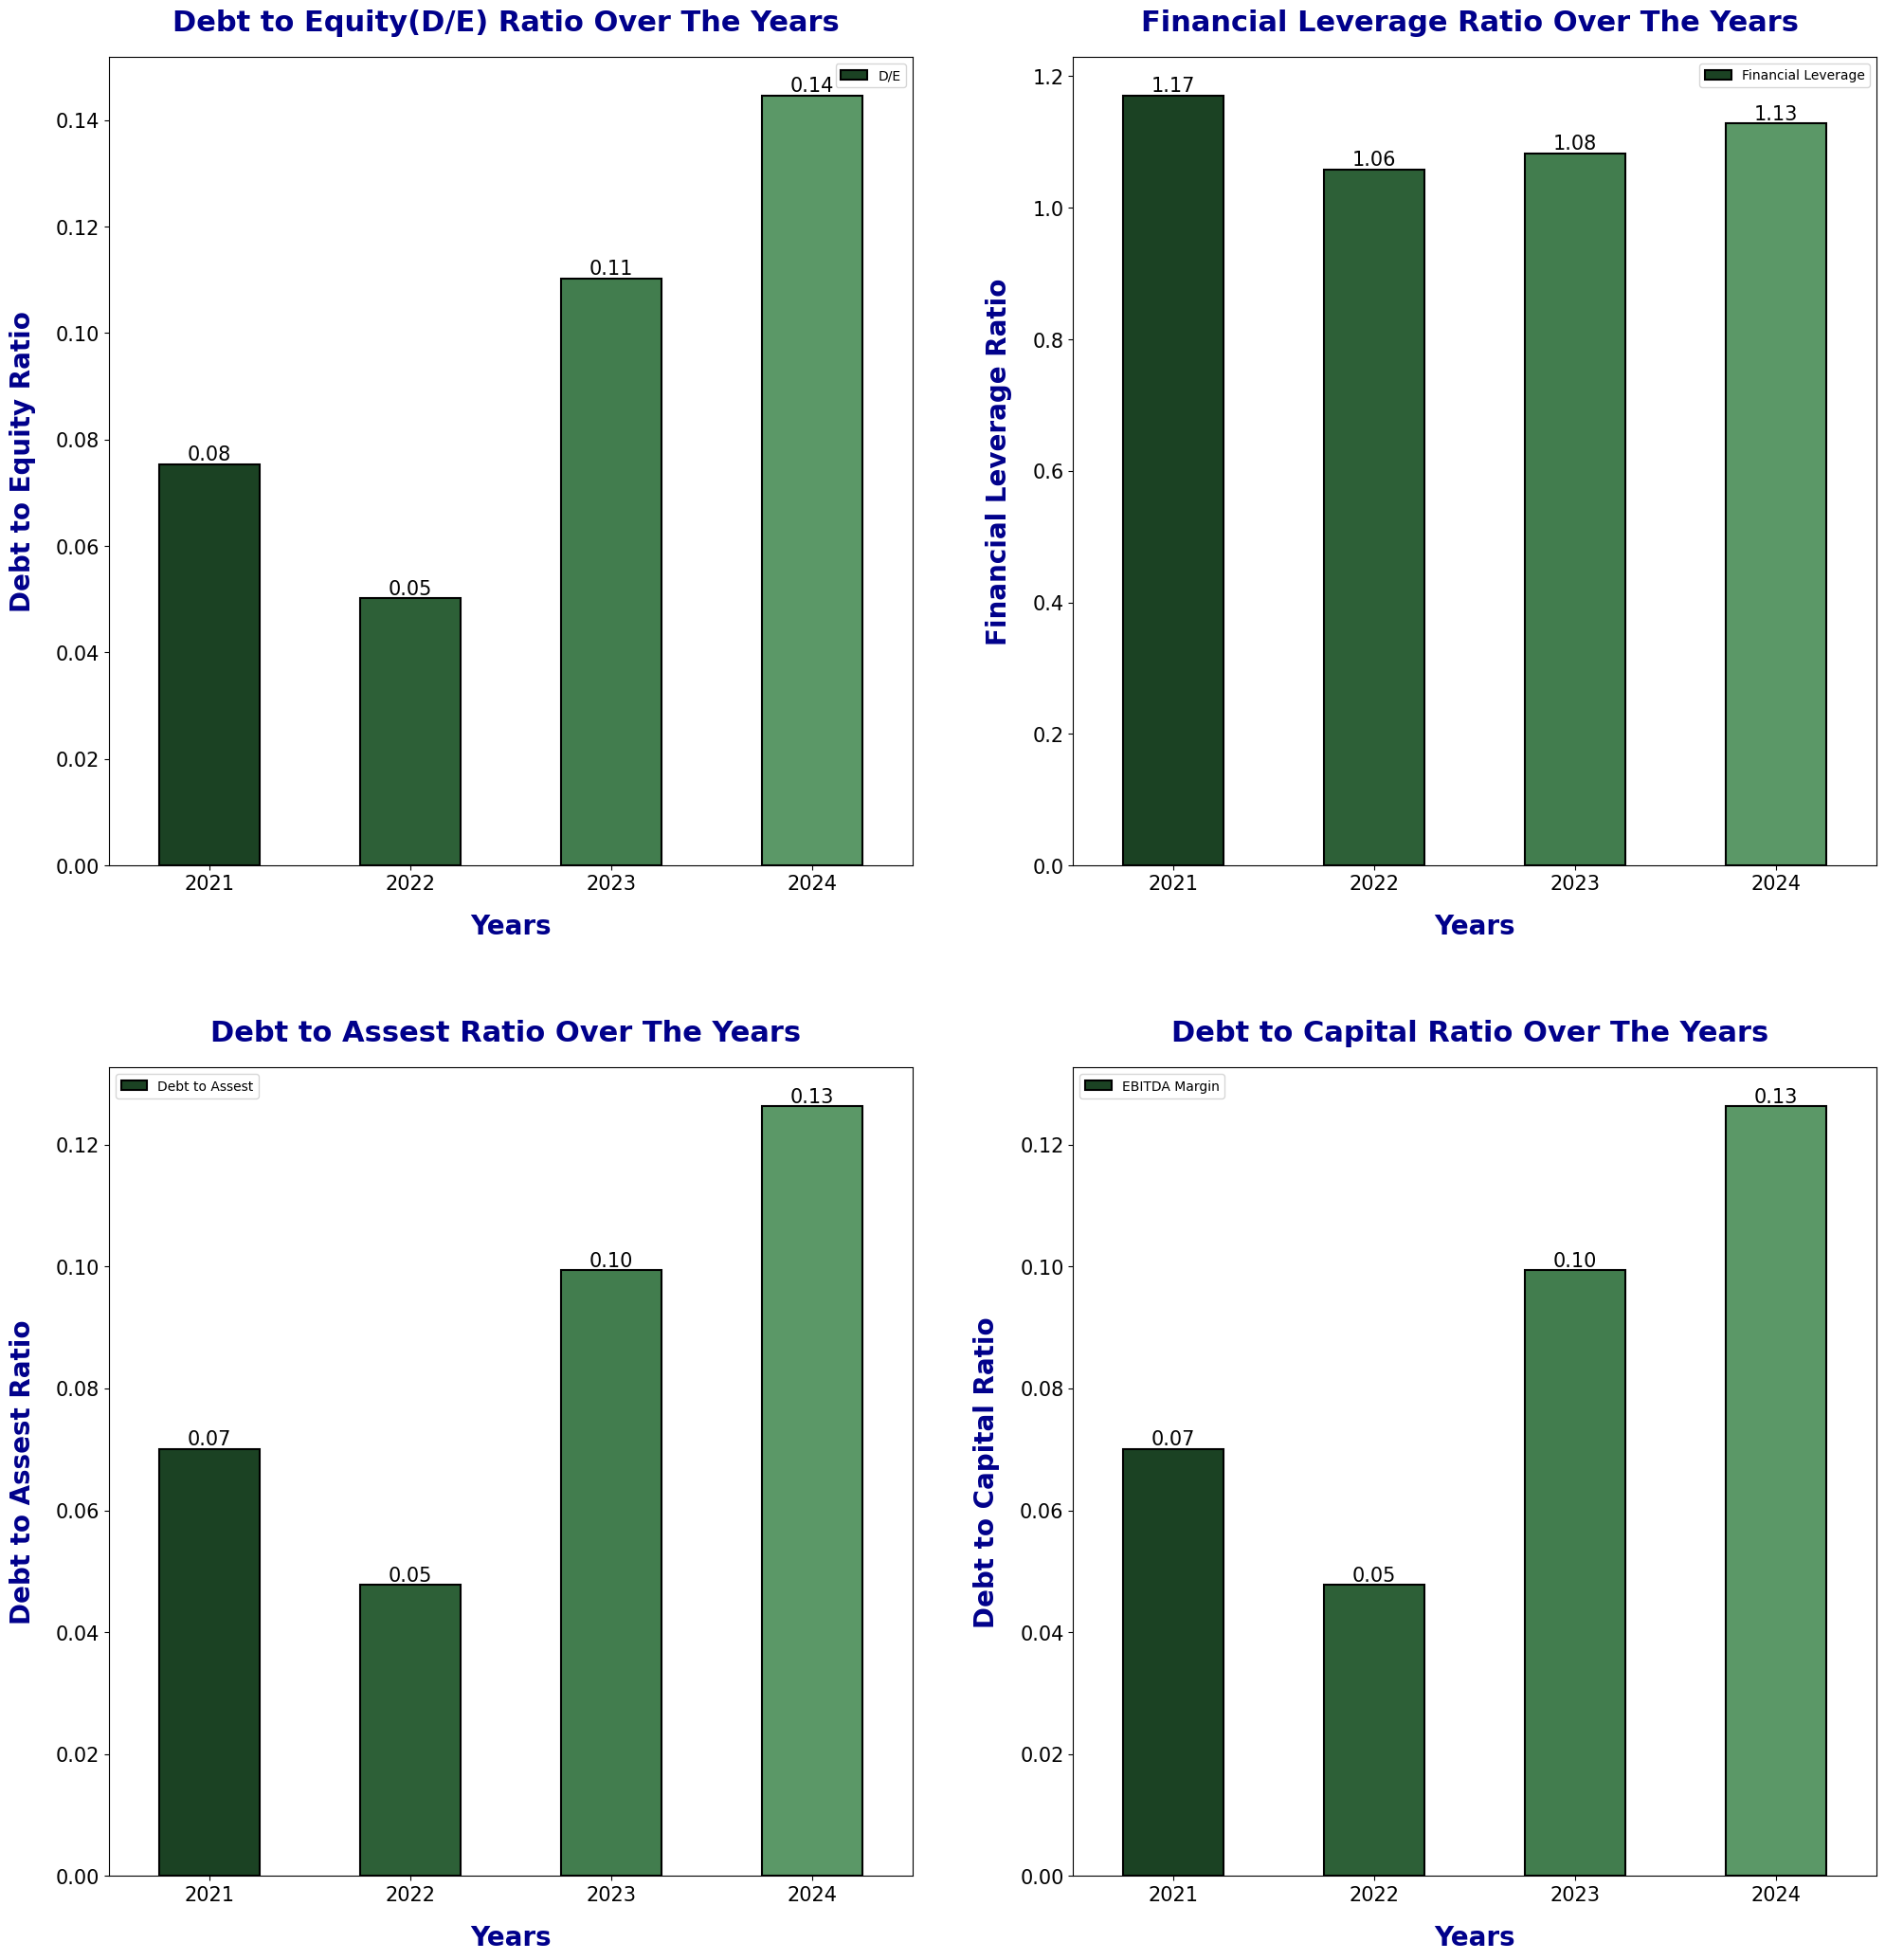

In [410]:

plt.figure(figsize=(20,20))
  # Add edgecolor and linewidth for outline
colorg = sns.cubehelix_palette(start=2, rot=0, dark=0.2, light=0.7, reverse=True, as_cmap=False)
plt.subplot(2,2,2)

# Calculate Debt to Equity
fin_lev=zr.loc['Financial Leverage']
fin_lev=fin_lev.iloc[::-1]

# Plot the bars with individual colors for each bar
fin_lev.plot(kind='bar', color=[colorg[i % len(colorg)] for i in range(len(fin_lev))],edgecolor='black', linewidth=1.5)  
plt.title('Financial Leverage Ratio Over The Years ', fontsize=22, fontweight="bold", color='darkblue', pad=20)
plt.xlabel('Years', fontweight="bold", color='darkblue', labelpad=15, fontsize=20) 
plt.ylabel('Financial Leverage Ratio', fontweight="bold", color='darkblue', labelpad=15, fontsize=20)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(fontsize=15)


# Adding classy black value labels
for i, v in enumerate(fin_lev):
    plt.text(i, v , f'{v:.2f}', ha='center', va='bottom', fontsize=15, color='black')

plt.tight_layout()
plt.legend()



plt.subplot(2,2,1)


colorg = sns.cubehelix_palette(start=2, rot=0, dark=0.2, light=0.7, reverse=True, as_cmap=False)

# Calculate Debt to Equity
d_e=zr.loc['D/E']
d_e=d_e.iloc[::-1]

# Plot the bars with individual colors for each bar
d_e.plot(kind='bar', color=[colorg[i % len(colorg)] for i in range(len(d_e))], edgecolor='black', linewidth=1.5)  
plt.title('Debt to Equity(D/E) Ratio Over The Years ', fontsize=22, fontweight="bold", color='darkblue', pad=20)
plt.xlabel('Years', fontweight="bold", color='darkblue', labelpad=15, fontsize=20) 
plt.ylabel('Debt to Equity Ratio', fontweight="bold", color='darkblue', labelpad=15, fontsize=20)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(fontsize=15)


# Adding classy black value labels
for i, v in enumerate(d_e):
    plt.text(i, v , f'{v:.2f}', ha='center', va='bottom', fontsize=15, color='black')

plt.tight_layout()
plt.legend()
    






plt.subplot(2,2,3)


colorg = sns.cubehelix_palette(start=2, rot=0, dark=0.2, light=0.7, reverse=True, as_cmap=False)

# Calculate Debt to Assest
dta=zr.loc['Debt to Assest']
dta=dta.iloc[::-1]

# Plot the bars with individual colors for each bar
dta.plot(kind='bar', color=colorg , edgecolor='black', linewidth=1.5)  
plt.title('Debt to Assest Ratio Over The Years ', fontsize=22, fontweight="bold", color='darkblue', pad=20)
plt.xlabel('Years', fontweight="bold", color='darkblue', labelpad=15, fontsize=20) 
plt.ylabel('Debt to Assest Ratio', fontweight="bold", color='darkblue', labelpad=15, fontsize=20)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(fontsize=15)


# Adding classy black value labels
for i, v in enumerate(dta):
    plt.text(i, v  , f'{v:.2f}', ha='center', va='bottom', fontsize=15, color='black')

plt.legend()

plt.subplot(2,2,4)
dta=zr.loc['Debt to Capital']
dta=dta.iloc[::-1]

dta.plot(kind='bar', color=colorg , label ='EBITDA Margin' , alpha=1, edgecolor='black', linewidth=1.5)
plt.title('Debt to Capital Ratio Over The Years ', fontsize=22, fontweight="bold", color='darkblue', pad=20)
plt.xlabel('Years', fontweight="bold", color='darkblue', labelpad=15, fontsize=20) 
plt.ylabel('Debt to Capital Ratio', fontweight="bold", color='darkblue', labelpad=15, fontsize=20)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(fontsize=15)

for i, v in enumerate(dta):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom' , fontsize=15)


plt.legend()
plt.subplots_adjust(wspace=0.2 , hspace=0.25)
plt.savefig("solvency ratio", dpi=300 , bbox_inches='tight')
plt.show()



